<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/Pima_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

In this coursework, I am going to develop a machine learning model to predict Diabetes. The dataset contains medical data of different female patients describing several health conditions (features) & if the patient has diabetes or not (label). It consists of 768 observations, of which 268 are positive for diabetes(label equal 1) and 500 are negative for diabetes (label equal 0). 
For each method selected, we have to evaluate the performance of different parameters or different versions of the algorithm considering the metrics studied in our lectures (precision, recall, accuracy, etc). Based on the obtained results, we have to compare the best version of each method with the remaining ones. Also, to use some of the common python libraries like scikit, Keras, TensorFlow, matplotlib, seaborn, etc. Assigned tasks will include Data exploration(Load the dataset), data pre-processing ( Split and clean the dataset), machine learning method selection and implementation(Load and train the chosen classification methods and parameters), and model performance evaluation(Plot the results for each method and parameter (using tables or graphs).

**Solution and Steps:-**

1. Data Exploration
2. Data Pre-processing
3. Model Implementation
4. Performance Evaluation
5. Result Analysis and Discussion

### ***Loading the dataset, Split and cleaning the dataset***

**a) Importing Python Libraries**

In [32]:
import pandas as pd
import numpy as np
#Importing Plotting Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
#Importing Mathematical Libraries
import math

#To support K mean
from sklearn.cluster import KMeans
#To support classification
from sklearn.datasets import make_classification
#To Support Plots
from matplotlib import pyplot
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#from sklearn.metrics import classification_report,accuracy_score
#from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor
#from sklearn.svm import OneClassSVM
#from pylab import rcParams

#To Support Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
#To support Linear SVC Classifier
from sklearn.svm import LinearSVC
#To support CalibratedClassifierCV
from sklearn.calibration import CalibratedClassifierCV
#To support GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
#To support GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#To support confusion Matrix
from sklearn.metrics import confusion_matrix
#To support ROC and AUC curves
from sklearn.metrics import roc_curve, auc
%matplotlib inline
import seaborn as sns  #To perform visualization
sns.set_style('whitegrid')
import warnings #To ignore warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
from sklearn.naive_bayes import MultinomialNB
#from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import operator

**B) Importing and Loading Data set**

In [33]:
dataset = pd.read_csv('diabetes.csv') # we used "dataset" as a variable and called pandas dataframe "pd" for reading csv file with the help of pd.read_csv "file name"
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Checking size of the data in rows and columns**


In [34]:
print("The data has {} data points".format(dataset.shape[0]))
print("The data has {} features".format(dataset.shape[1]))
dataset.shape #Displays the total count of Rows and Colums details from the dataset.

The data has 768 data points
The data has 9 features


(768, 9)

In [35]:
# Get data type for each attribute 
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**C) Data Features :-**

*Checking basic information from the data*

In [36]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
# Get the column names 
a = dataset.columns
a

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
status = pd.Series([]) 
status


Series([], dtype: float64)

**Checking numerical feautres from the data**

In [39]:
(dataset.describe()) # Displays the Numerical parameters (such as count, mean, standard deviation min and max deatils)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**D) Finding Missing Values**

In [40]:
dataset.isnull().sum().sum()


0

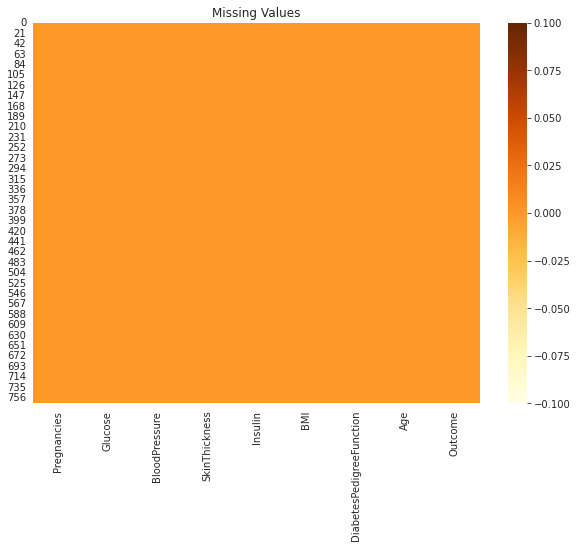

In [41]:
plt.figure(figsize=(10,7)) 
sns.heatmap(dataset.isna(), cmap='YlOrBr')
plt.title("Missing Values") 
plt.show()

**There are no missing entries in the data**

In [42]:
#Create Nutritional status column 
Nutritional_status = pd.Series([]) 

In [43]:
# Nutritional status based on BMI

for i in range(len(dataset)): 
    if dataset['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif dataset['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif dataset['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif dataset['BMI'][i] >= 25 and dataset['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif dataset['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= dataset['BMI'][i] 

In [44]:
# Insert new column - Nutritional Status
dataset.insert(6, "Nutritional Status", Nutritional_status)

In [45]:
# Check df containing new column
dataset.head (5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [46]:
dataset['Nutritional Status'].value_counts()

Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: Nutritional Status, dtype: int64

11 women don't have information about BMI. Only 106 of 758 women have normal weight. Most of the women present overweight or obesity.

In [47]:
# Create OGTT_Interpretation (Interpretation of Glucose level) column 
OGTT_Interpretation = pd.Series([]) 

In [48]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)
for i in range(len(dataset)): 
    if dataset['Glucose'][i] == 0.0: 
        OGTT_Interpretation [i]="NA"
    
    elif dataset['Glucose'][i] <= 140: 
        OGTT_Interpretation [i]="Normal"
    
    elif dataset['Glucose'][i] > 140 & dataset['Glucose'][i] <= 198: 
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"
        
    elif dataset['Glucose'][i] > 198: 
        OGTT_Interpretation[i]="Diabetic Level"
        
    else: 
        OGTT_Interpretation [i]= dataset['Glucose'][i] 

In [49]:
# Insert new column - Glucose Result
dataset.insert(2, "Glucose Result", OGTT_Interpretation)

In [50]:
dataset['Glucose Result'].value_counts()

Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: Glucose Result, dtype: int64

Not a single individual from the sample showed OGTT result at "Diabetic levels". Would be interesting to calculate HOMA-IR to get information about insulin resistance of the sample. *****DISCUSS HERE ABOUT GLUCOSE INTOLERANCE AND INSULIN RESISTANCE********

In [51]:
Impaired_Glucose_Tolerance_Diabetic = ((dataset['Glucose'] > 140 ) & (dataset ['Glucose'] <= 198) & (dataset ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

**Not every women with impaired glucose tolerance have diabetes. That can show that the ones with impaired glucose tolerance might be in risk of developing diabetes or are diabetic, but not already diagnosed.**

In [52]:
Normal_Glucose_Diabetic = ((dataset['Glucose'] != 0 ) & (dataset['Glucose'] <= 140) & (dataset['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

**Half of the diabetic women showed normal glucose level. Information regarding drug therapy is needed.**

In [53]:
# Create Percentile of skin thickness column

Percentile_skin_thickness = pd.Series([]) 

In [54]:
# Check how many women are 80 or older (the Percentile skin thickeness depend of skin fold and age)
dataset['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [55]:
#  Check skin fold thickness Percentile

for i in range(len(dataset)): 
    
    
    if dataset["Age"][i] >= 20.0 and dataset["Age"][i] <= 79.0: 
        
        if dataset["SkinThickness"][i] == 0.0: 
            Percentile_skin_thickness[i]=" 0 NA"
    
        elif dataset["SkinThickness"][i] < 11.9: 
            Percentile_skin_thickness[i]="1 <P5th"
        
        elif dataset["SkinThickness"][i] == 11.9: 
            Percentile_skin_thickness[i]="2 P5th"
        
        elif dataset["SkinThickness"][i] > 11.9 and dataset["SkinThickness"][i] < 14.0: 
            Percentile_skin_thickness[i]="3 P5th - P10th"
        
        elif dataset["SkinThickness"][i] == 14.0: 
            Percentile_skin_thickness[i]="4 P10th"
        
        elif dataset["SkinThickness"][i] > 14.0 and  dataset["SkinThickness"][i] < 15.8: 
            Percentile_skin_thickness[i]="5 P10th - P15th"
        
        elif dataset["SkinThickness"][i] == 15.8: 
            Percentile_skin_thickness[i]="6 P15th"
    
        elif dataset["SkinThickness"][i] > 15.8 and dataset["SkinThickness"][i] < 18.0: 
            Percentile_skin_thickness[i]="7 P15th - P25th"
    
        elif dataset["SkinThickness"][i] == 18.0: 
            Percentile_skin_thickness[i]="8 P25th"
        
        elif dataset["SkinThickness"][i] > 18.0 and dataset["SkinThickness"][i] < 23.5: 
            Percentile_skin_thickness[i]="9 P25th - P50th"
   
        elif dataset["SkinThickness"][i] == 23.5: 
            Percentile_skin_thickness[i]="10 P50th"
        
        elif dataset["SkinThickness"][i] > 23.5 and dataset["SkinThickness"][i] < 29.0: 
            Percentile_skin_thickness[i]="11 P50th - P75th"
        
        elif dataset["SkinThickness"][i] == 29.0: 
            Percentile_skin_thickness[i]="12 P75th"
        
        elif dataset["SkinThickness"][i] > 29.0 and dataset["SkinThickness"][i] < 31.9: 
            Percentile_skin_thickness[i]="13 P75th - P85th"
        
        elif dataset["SkinThickness"][i] == 31.9: 
            Percentile_skin_thickness[i]="14 P85th"
        
        elif dataset["SkinThickness"][i] > 31.9 and dataset["SkinThickness"][i] < 33.7: 
            Percentile_skin_thickness[i]="15 P85th - P90th"
    
        elif dataset["SkinThickness"][i] == 33.7: 
            Percentile_skin_thickness[i]="16 P90th"
        
        elif dataset["SkinThickness"][i] > 33.7 and dataset["SkinThickness"][i] < 35.9: 
            Percentile_skin_thickness[i]="17 P90th - P95th"
    
        elif dataset["SkinThickness"][i] == 35.9: 
            Percentile_skin_thickness[i]="18 P95th"
        
        elif dataset["SkinThickness"][i] > 35.9: 
            Percentile_skin_thickness[i]="19 >P95th"
            
    elif dataset["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  dataset["SkinThickness"][i] > 31.7: 
            Percentile_skin_thickness[i]="20 >P95th"


<i>**Note**</i>: As I have 2 >P95 I chose to add numbers in front of each percentile to easily visualize which >P95 it belonged. 

In [56]:
# Insert new column - Percentile of skin thickness
dataset.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

In [57]:
# Check the first 5 rows
dataset.head(5)

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,17 P90th - P95th,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,12 P75th,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0 NA,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,9 P25th - P50th,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,17 P90th - P95th,35,168,43.1,Obese,2.288,33,1


**It looks like the Percentile of the triceps skin fold thickness can predict the Nutritional Status.**

In [58]:
# Check number of women x Percentile of skin thickness
dataset['Percentile skin thickness'].value_counts()

 0 NA               227
19 >P95th           145
11 P50th - P75th     87
9 P25th - P50th      79
15 P85th - P90th     50
13 P75th - P85th     46
17 P90th - P95th     23
8 P25th              20
7 P15th - P25th      20
3 P5th - P10th       18
12 P75th             17
1 <P5th              15
5 P10th - P15th      14
4 P10th               6
20 >P95th             1
Name: Percentile skin thickness, dtype: int64

**227 women don't have information regarding skin fold. Most of the sample have Percentile of skin thickness greater than 95th. 53 women had value below P15 indicating that they might be malnourished. Only one woman is 80 years old or older and she presents a Percentile of skin thickness greater than 95th.**

In [59]:
diabetic_malnourished_st = ((dataset ['SkinThickness'] < 15.8) & (dataset ['Outcome'] == 1)).sum()
diabetic_malnourished_st

94

In [60]:
diabetic_malnourished_bmi = ((dataset ['BMI'] < 18.5) & (dataset ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi

2

In [61]:
diabetic_malnourished_bmi_st = ((dataset ['BMI'] < 18.5) & (dataset ['SkinThickness'] < 15.8) & (dataset ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi_st

2

Interesting to note that 94 diabetic women were classified as underweight/malnourished based only on Skin thickness, but only 2 diabetic women presented underweight/malnutrition when considering BMI or BMI & Skin Thickness. Skinfold thicknesses are difficult measurements to make with precision and accuracy without rigorous training, for that reason they are rarely used today and not universally applicable. Besides, skinfold thickness can be problematic to identify malnutrition in many individuals as they vary with diseases such as diabetes, menopause, and hydrational status. That way, more data should be included in this dataset to help to identify malnutrition using skinfold thickness measurement.

In [62]:
[] # Minimum

[]

In [63]:
dataset.min()

Pregnancies                                           0
Glucose                                               0
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                         0
Percentile skin thickness                          0 NA
SkinThickness                                         0
Insulin                                               0
BMI                                                 0.0
Nutritional Status                                   NA
DiabetesPedigreeFunction                          0.078
Age                                                  21
Outcome                                               0
dtype: object

It can be seem that only adult women were included as the minimum age is 21 years old. It can be noticed that a number of women don't have information of some of the attributes, such as glucose, blood pressure, etc as the minimum value is zero.

In [64]:
[] #Maximum

[]

In [65]:
dataset.max()

Pregnancies                               17
Glucose                                  199
Glucose Result                        Normal
BloodPressure                            122
Percentile skin thickness    9 P25th - P50th
SkinThickness                             99
Insulin                                  846
BMI                                     67.1
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

The nutritional status 'underweight' should not be classified as Max Value in medical point of view. However, it was considered as a Max value as it starts with the letter U.

In [66]:
#Check if the sample were classified as Underweight presented a BMI lower than 18.5
pima_underweight = dataset[dataset['Nutritional Status'] =='Underweight']
pima_underweight

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
239,0,104,Normal,76,0 NA,0,0,18.4,Underweight,0.582,27,0
418,1,83,Normal,68,0 NA,0,0,18.2,Underweight,0.624,27,0
438,1,97,Normal,70,5 P10th - P15th,15,0,18.2,Underweight,0.147,21,0
526,1,97,Normal,64,9 P25th - P50th,19,82,18.2,Underweight,0.299,21,0


In [67]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

500 not diabetic and 268 are diabetic

In [68]:
# Another way of counting the outcome (diabetes)
count_not_diabetic = len(dataset[dataset['Outcome']==0])
count_not_diabetic

500

In [69]:
# Check the average of features grouped by Outcome (Diabetes)

dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


It looks like the average of all features is higher in diabetic women.

In [70]:
dataset.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

As some of the women have no information of a number of attributes, such as glucose, blood pressure and BMI the average of those items might not be correct. To get the correct value only the women with a value > zero should be included to calculate the average.

In [71]:
# Shows women that contains information about Glucose

pima_glucose = dataset.loc[dataset['Glucose'] != 0]

In [72]:
pima_glucose.shape

(763, 12)

Most women of the sample have data regarding glucose (only 5 of them don't have any glucose value) as it is an important information to check the health status of a diabetic person.

In [73]:
# Check average of glucose from women that don't have zero value of glucose
pima_glucose['Glucose'].mean()

121.6867627785059

The average of glucose is at the normal range (less than 140 mg/dl).

In [74]:
pima_glucose.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.317304,0.430662,31.247485
1,4.860902,142.319549,70.800752,22.056391,101.090226,35.106015,0.550605,37.052632


In [75]:
# Check minimum and maximum values of glucose from women that don't have zero value of glucose
pima_glucose['Glucose'].min()

44

In [76]:
pima_glucose['Glucose'].max()

199

As it shows above, some women have information about glucose but no information about insulin. Moreover, it shows that 5 women don't have information about glucose as the result shows 763 rows. Furthermore, the maximum value of glucose is 199, considered a Diabetic level. Therefore, even diagnosed with diabetes they don't present high glucose value. The dataset should have information about drug therapy.

In [77]:
# Shows women that have information about Blood pressure
pima_BloodPressure = dataset.loc[dataset['BloodPressure'] != 0]

In [78]:
pima_BloodPressure.shape

(733, 12)

In [79]:
# Check the average of blood pressure (only from women that don't have zero value of Blood Pressure)

pima_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [80]:
# Minimum and maximum of Blood Pressure from women that don't have zero value of Blood Pressure
pima_BloodPressure['BloodPressure'].min()

24

In [81]:
pima_BloodPressure['BloodPressure'].max()

122

35 women don't have information about Blood Pressure as the result shows 733 rows. The maximum value of Diastolic Blood Pressure shows that there are a possibility of some women to have hypertension (>90 mmHg) as it can be diagnosed when the blood pressure is 140/90 mmHg or higher (NICE, 2019). Diabetic individuals should be treated to Diastolic blood pressure goal of less than 90 mmHg. It is recommended that blood pressure should be measured at least annually in an adult with type 2 diabetes without previously diagnosed hypertension or renal disease (NICE, 2019). Systolic Blood Pressure measure should have been included in this dataset as studies show that blood pressure equal or greater than 115/75 mmHg is associated with increased rates of several diseases, including heart failure, kidney disease and mortality (BOER et al, 2017). Looking at the minimum value of Diastolic Blood Pressure (24 mmHg) it is totally out of the normal range even when the heart is 'relaxing' (between 40 to 160 mmHg). Individual with Diastolic blood pressure less or equal to 60 mmHg has low blood pressure (BLOOD PRESSURE UK).

In [82]:
pima_insulin = dataset.loc[dataset['Insulin'] != 0]

In [83]:
pima_insulin.shape

(394, 12)

In [84]:
# Check average value of insulin from women that don't have zero value of insulin
pima_insulin['Insulin'].mean()

155.5482233502538

In [85]:
# Check minimum and maximum of Insulin value from women that don't have zero value of insulin
pima_insulin['Insulin'].min()

14

In [86]:
pima_insulin['Insulin'].max()

846

Normal range of 2h insulin is from 16 to 166 mIU/L. The average value of 2h insulin of the samples show a normal range. However, some women of the sample seem to present high level of insulin level. It might be due obesity, early stage of T2DM or excessive insulin administration.

In [87]:
# Check women that don't have zero value of BMI

pima_BMI = dataset.loc[dataset['BMI'] != 0]

In [88]:
pima_BMI.shape

(757, 12)

In [89]:
# Check average of BMI from women that don't have zero value of BMI

pima_BMI['BMI'].mean()

32.45746367239099

The average value of BMI indicates obesity (BMI >= 30 kg/m2)

In [90]:
# Check minimun and maximum value of BMI from women that don't have zero value of BMI
pima_BMI['BMI'].min()

18.2

In [91]:
pima_BMI['BMI'].max()

67.1

The minimum value of BMI shows that there is no case of underweight, but the maximum value shows cases of women with morbid obesity (BMI >= 40kg/m2).

In [92]:
# Check only the women that have all the values of BMI, Glucose, Insulin and Blood Pressure

pima_all = dataset.loc[(dataset['BMI'] != 0) & (dataset['Insulin'] != 0) & (dataset['BloodPressure'] != 0) & (dataset['Glucose'] != 0)]

In [93]:
pima_all.shape

(392, 12)

Only 392 women have information about all the attributes. That number represents less than half of the sample (around 49% of the women of the sample have all information of all attributes).

In [94]:
pima_all['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

262 women don't have DM and 130 have DM.

In [95]:
pima_all.mean()

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [96]:
pima_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


Diabetic women tend to have higher number of pregnancies, higher level of glucose, higher Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age. Both groups present BMI that indicates obesity. Women that have Diabetes have an average of insulin that is higher than the normal range (16 - 166  mIU/L). Both groups have average of glucose higher than the normal range (<= 100 mg/dL). It might indicate that some non diabetic women are in risk of have Diabetes in the future, specially the ones with higher levels of insulin (that might have insulin resistance).

In [97]:
pima_all.min()

Pregnancies                                           0
Glucose                                              56
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                        24
Percentile skin thickness                       1 <P5th
SkinThickness                                         7
Insulin                                              14
BMI                                                18.2
Nutritional Status                               Normal
DiabetesPedigreeFunction                          0.085
Age                                                  21
Outcome                                               0
dtype: object

In [98]:
pima_all.max()

Pregnancies                               17
Glucose                                  198
Glucose Result                        Normal
BloodPressure                            110
Percentile skin thickness    9 P25th - P50th
SkinThickness                             63
Insulin                                  846
BMI                                     67.1
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

In [99]:
diabetic_malnourished = ((pima_all ['SkinThickness'] < 15.8) & (pima_all ['Outcome'] == 1)).sum()
diabetic_malnourished

4

In [100]:
diabetic_overweight_obese = ((pima_all ['BMI'] <= 30) & (pima_all ['Outcome'] == 1)).sum()
diabetic_overweight_obese

20

20 from 130 Diabetic women are overweight or obese.

**E) Data Inspection**

**Histogram**

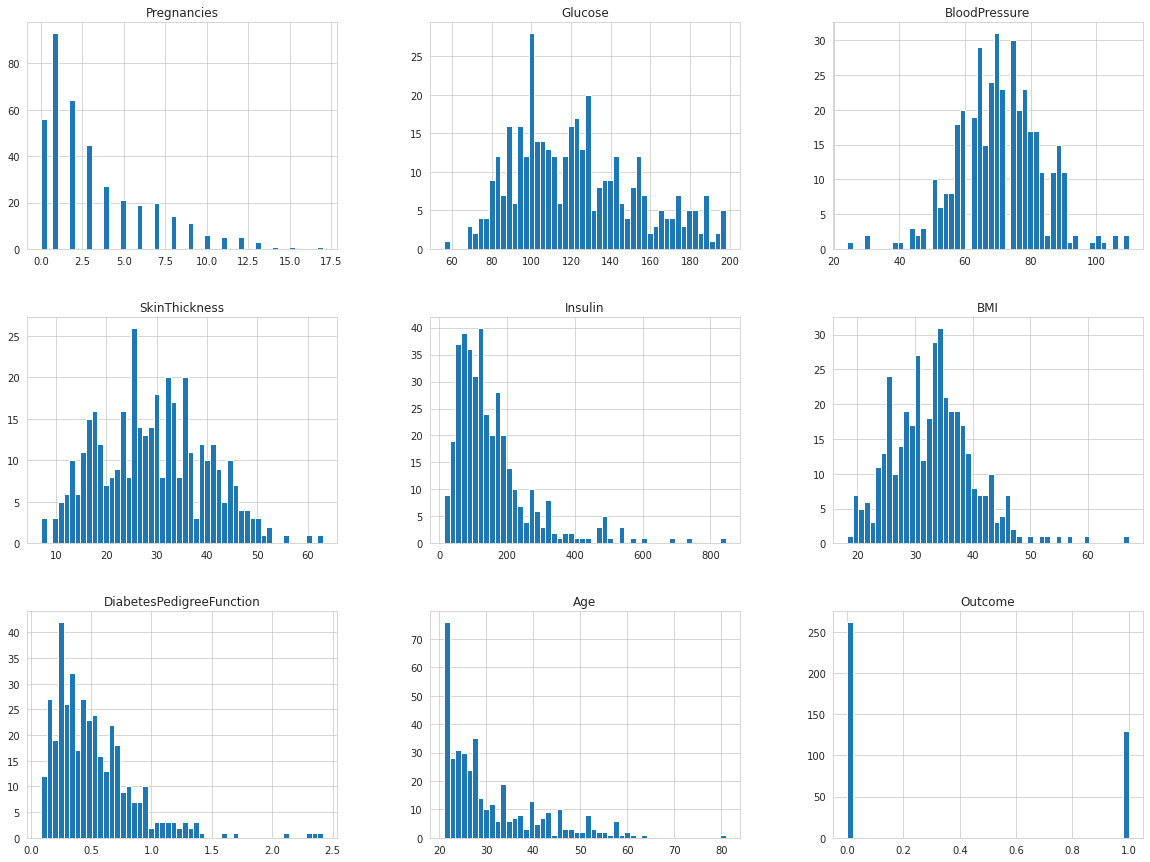

In [101]:
# Histogram
pima_all.hist(bins=50, figsize=(20, 15))
plt.show()

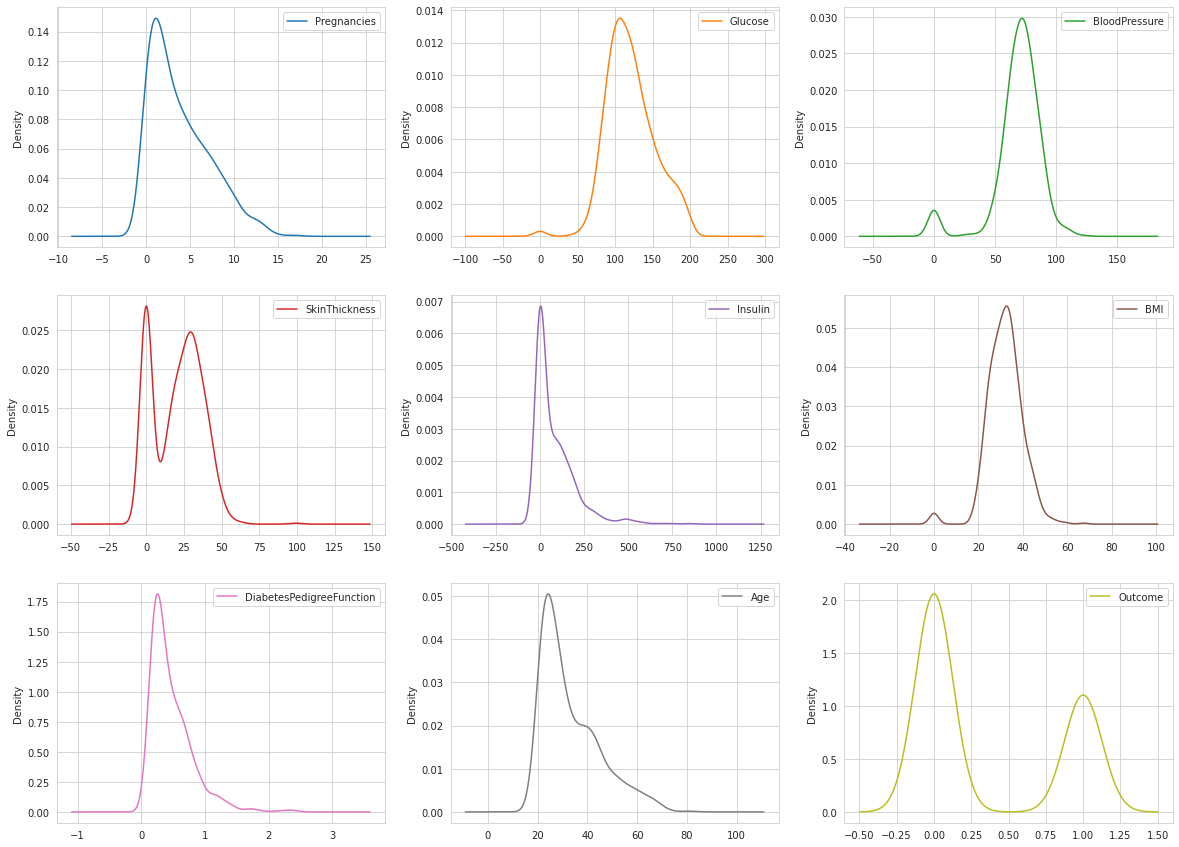

In [102]:
# Density plots for all attributes to visualize the distribution of each attribute
dataset.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

**BOX Plot**

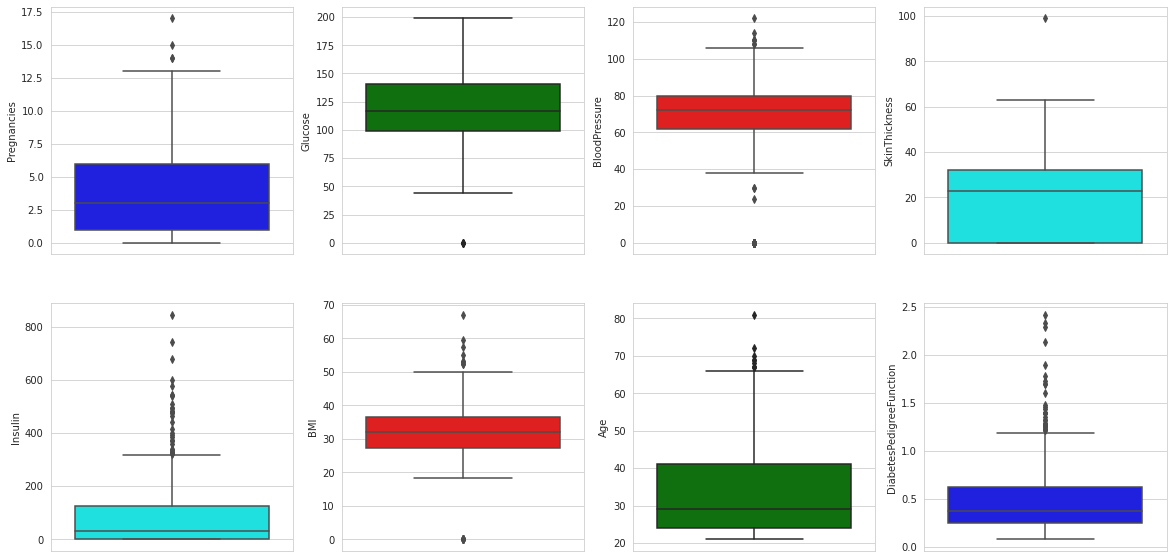

In [103]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
sns.boxplot(y = dataset.Pregnancies,color='blue')
plt.subplot(2,4,2)
sns.boxplot(y = dataset.Glucose,color='green')
plt.subplot(2,4,3)
sns.boxplot(y = dataset.BloodPressure,color='red')
plt.subplot(2,4,4)
sns.boxplot(y = dataset.SkinThickness,color='cyan')
plt.subplot(2,4,5)
sns.boxplot(y = dataset.Insulin,color='cyan')
plt.subplot(2,4,6)
sns.boxplot(y = dataset.BMI,color='red')
plt.subplot(2,4,7)
sns.boxplot(y = dataset.Age,color='green')
plt.subplot(2,4,8)
sns.boxplot(y = dataset.DiabetesPedigreeFunction,color='blue')
plt.show()

In [104]:
#Skew of attributes distributions
#skew=pima_all.skew(axis = 1)

Bell shape curve: Blood Pressure
Right-Skewed: Age, Insulin, Pregnancies, Diabetes Pedigree Function

Short IQR: insulin, Diabetes Pedigree Function, Blood Pressure and BMI
At least 75% of the women:


*   are 25 years old or older
*   have BMI nearly 30 kg/m2
*   have insulin level 100 or more
*   have 1 or more pregnancies
*   have glucose level of 100 mg/dL or more
*   have blood pressure of 60 mmHg or more

**Correlation**

In [105]:
# Correlation between the different characteristics. Closer to 1 better is the correlation.
corr_matrix_pearson = pima_all.corr(method='pearson')
corr_matrix_pearson

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


There are no strong correlation between the features. The 'strongest' ones are the following (as expected):


*   Age x pregnancies (0.68) - Older women tend to have higher number of pregnancies

*   Glucose x insulin (0.58)

*   Glucose x outcome (0.52) - Women that have higher level of glucose tend to have higher level of insulin and have DM

*   Skin fold thickness x BMI (0.66) - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)

Negative correlation:

*   BMI x Pregnancies (-0.025)

*   Blood Pressure x Diabetes Pedigree Function (-0.016)

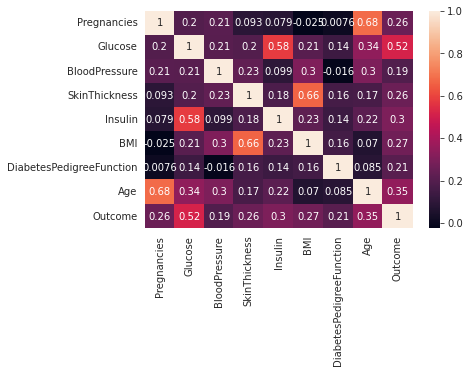

In [106]:
sns.heatmap(corr_matrix_pearson, annot = True)

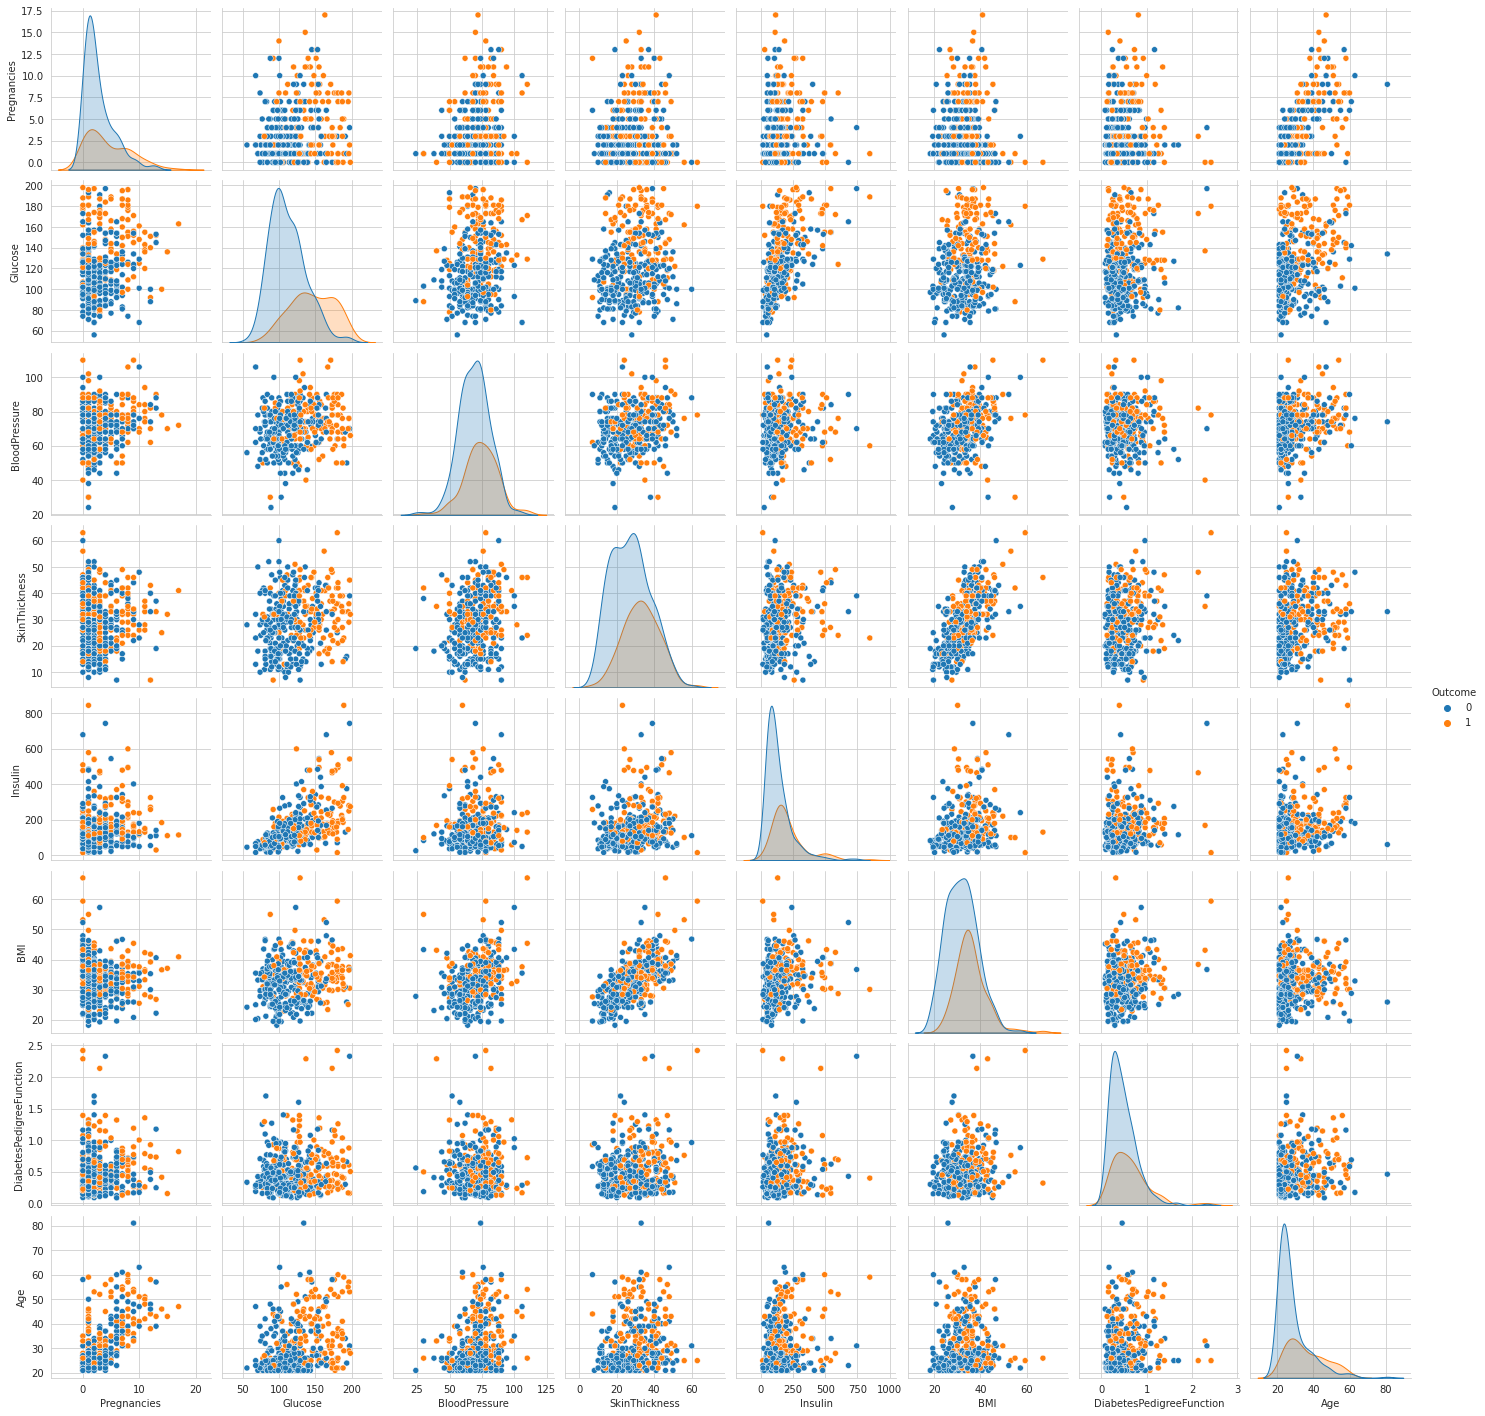

In [107]:
# Pairplot
sns.pairplot(pima_all, hue='Outcome')

Diabetic women tend to show larger values of age, BMI, insulin, skin thickness, blood pressure, and pregnancies.
The feature that it is possible to see 2 distinct groups (diabetic and non diabetic) is glucose.

## ***Load and train the chosen classification methods and parameters***

### **Logistic Regression**

In [ ]:
#1st Iteration - 8 variables
var1=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=pima_all[var1]
y=pima_all.Outcome

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)

## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.563677
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Mar 2022   Pseudo R-squ.:                  0.1128
Time:                        21:36:41   Log-Likelihood:                -220.96
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 8.717e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1299      0.049      2.655      0.008       0.034

##### This model can explain 56% of the variation in dependent variable. SkinThickness, BMI, Diabetes Pedigree Function, Age, and Insulin are attributes to be eliminated in the next model. as variables that influence the outcome should have a p-value less than 0.05. 

In [ ]:
#2nd Iteration - 3 variables
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.574607
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            2
Date:                Sun, 13 Mar 2022   Pseudo R-squ.:                 0.09558
Time:                        21:36:41   Log-Likelihood:                -225.25
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 4.597e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1405      0.037      3.826      0.000       0.069       0.212
Glucose           0.

##### This model can explain 57% of the variation in dependent variable. All the variables show a p-value < 0.005.

In [ ]:
logreg = LogisticRegression()
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
y=pima_all.Outcome
logreg.fit(X,y)

## Defining the y_pred variable for the predicting values. 
y_pred=logreg.predict(X)

## Calculating the precision of the model
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       262
           1       0.68      0.55      0.61       130

    accuracy                           0.77       392
   macro avg       0.74      0.71      0.72       392
weighted avg       0.76      0.77      0.76       392



##### The model precision of model #2 (3 variables) is 76%.

In [ ]:
## Confusion matrix gives the number of cases that the model is able to accurately predict the outcomes, and the number of cases the model gives false positive and false negatives
confusion_matrix  = confusion_matrix(y, y_pred)
print(confusion_matrix)

TypeError: ignored

### **Decision Tree**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X= dataset[dataset.columns[0:-1]]
#del(X['SkinThickness'])
#del(X['BloodPressure'])
#del(X['Pregnancies'])
#del(X['Insulin'])
#del(X['DiabetesPedigreeFunction'])
#del(X['Glucose'])
Y=dataset[dataset.columns[-1]]
# create a helper function

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,stratify=Y,random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_adult_census(model):
    n_features = X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    ##plt.show()
    ##fig=plt.figure()
    plt.savefig("feature_imporatnace_diabetes.png")
    plt.show()
    plt.close()
plot_feature_importances_adult_census(tree)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="diabetes_census_tree.dot",class_names=["0","1"],
feature_names=X.columns,impurity=False,filled=True)
import graphviz
with open("diabetes_census_tree.dot") as f:
    dot_graph = f.read()
    graphviz.Source(dot_graph)

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

In [ ]:
X=dataset[dataset.columns[0:-1]]
del(X['SkinThickness'])
del(X['BloodPressure'])
del(X['Pregnancies'])
del(X['Insulin'])
del(X['DiabetesPedigreeFunction'])
#del(X['Age'])
Y=dataset[dataset.columns[-1]]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,stratify=Y,random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_adult_census(model):
    n_features = X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    ##plt.show()
    ##fig=plt.figure()
    plt.savefig("feature_imporatnace_diabetes.png")
    plt.show()
    plt.close()
plot_feature_importances_adult_census(tree)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="diabetes_census_tree.dot",class_names=["0","1"],
feature_names=X.columns,impurity=False,filled=True)
import graphviz
with open("diabetes_census_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
#1st Iteration - 8 variables
var1=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=dataset_all[var1]
y=dataset_all.Outcome

### **SVM**

In [117]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier,test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'v', '^', 'o')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='v',
                    s=55, label='test set')


from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

In [ ]:
X = dataset[['Glucose','BMI']]
X

In [119]:
y = dataset[['Outcome']]

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [121]:
import numpy as np
X_train = np.array(X_train)

In [122]:
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [123]:
from sklearn import svm
machine1 = svm.SVC(kernel = 'linear')
machine1.fit(X_train,y_train)
y_pred = machine1.predict(X_test)

In [ ]:
plot_decision_regions(X_train, y_train, machine1)
print(plot_decision_regions)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7662337662337663

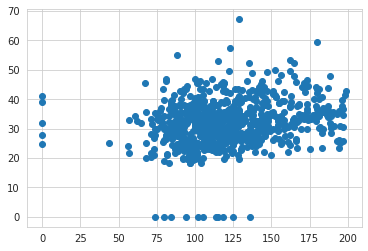

In [129]:
plt.scatter(np.array(X)[:,0],np.array(X)[:,1])
plt.show()

In [130]:
machine2 = svm.SVC(kernel = 'rbf')
machine2.fit(X_train,y_train)
y_pred2 = machine2.predict(X_test)

In [ ]:
plot_decision_regions(np.array(X), np.array(y), machine2)


In [ ]:
accuracy_score(y_test, y_pred2)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},{'clf__C': param_range,'clf__gamma': param_range,'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X_train, y_train)

In [ ]:
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
>>> clf = gs.best_estimator_
>>> clf.fit(X_train, y_train)
>>> print('Test accuracy: %.3f' % clf.score(X_test, y_test))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},{'clf__C': param_range,'clf__gamma': param_range,'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X_train, y_train)

In [ ]:
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
>>> clf = gs.best_estimator_
>>> clf.fit(X_train, y_train)
>>> print('Test accuracy: %.3f' % clf.score(X_test, y_test))

### **Random Forest**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from time import time
import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
dataset = pd.read_csv('diabetes.csv')
print (dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

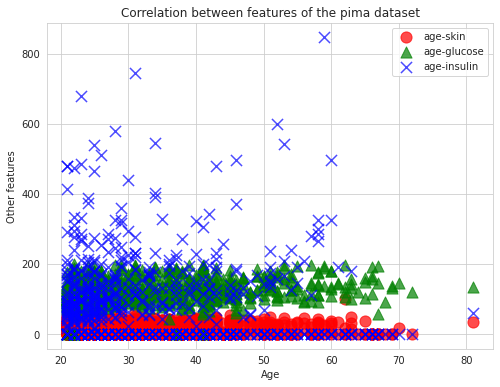

In [9]:
# generate scatter plots to find the correlation between different features
plt.figure(figsize=(8,6))

plt.scatter(dataset['Age'], dataset['SkinThickness'], marker = 'o', color= 'r', alpha= 0.7, s= 124, label= "age-skin")
plt.scatter(dataset['Age'], dataset['Glucose'], marker = '^', color= 'g', alpha= 0.7, s= 124, label= "age-glucose")
plt.scatter(dataset['Age'], dataset['Insulin'], marker = 'x', color= 'b', alpha= 0.7, s= 124, label= "age-insulin")

plt.title('Correlation between features of the pima dataset')

plt.xlabel('Age')
plt.ylabel('Other features')

plt.legend(loc='upper right')

plt.show()


In [10]:
#save the Outcome in a separate place and drop it from the dataset
label = dataset['Outcome']
dataset = dataset.drop('Outcome', axis= 1)

In [11]:
#split the dataset into training data and test data
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.1, random_state=42)

In [12]:
#make the classifier and apply it to the training data 
clf = RandomForestClassifier(n_estimators=1000, n_jobs= -1)
t0= time()
clf.fit(x_train, y_train)
print ("training time:", round(time()-t0, 3), "s")
clf

training time: 2.607 s


RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [13]:
pip install  scikit-learn==0.23.2

In [14]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(min_impurity_split=1e-07, n_estimators=1000, n_jobs=-1)

In [16]:
#now use the classifier to predict the outcome in test data
t1= time()
pred = clf.predict(x_test)
print ("prediction time:", round(time()-t1, 3), "s")

prediction time: 0.671 s


In [18]:
#calculate accuracy on test data
accuracy = clf.score(x_test, y_test)

In [19]:
print(accuracy)

0.7142857142857143


### **Plot the results for each method and parameter (using tables or graphs)**